In [387]:
import numpy as np
import time
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.optim as optim
import matplotlib.pyplot as plt
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

from Resources.Model import Model_v7, Model_v8, Model_v25, Model_v27
from Resources.Game import *


In [739]:
model_version   = 27
layer           = 14
number_pars     = 100

In [740]:
model = Model_v27()
pars = [i for i in model.parameters()]
for i, par in enumerate(pars):
    print(i, par.shape)
print(sum(i.numel() for i in model.parameters()))

0 torch.Size([240, 1, 12, 3, 3])
1 torch.Size([240])
2 torch.Size([360, 1, 12, 5, 5])
3 torch.Size([360])
4 torch.Size([600, 1, 12, 8, 8])
5 torch.Size([600])
6 torch.Size([1048, 15128])
7 torch.Size([1048])
8 torch.Size([1024, 1048])
9 torch.Size([1024])
10 torch.Size([1024, 1024])
11 torch.Size([1024])
12 torch.Size([128, 1024])
13 torch.Size([128])
14 torch.Size([1, 128])
15 torch.Size([1])
18706217


In [741]:
# pars = [i for i in model.parameters()]
# num_pars = pars[layer].numel()
# print(num_pars)

In [742]:
if model_version == 7:
    model = Model_v7()
if model_version == 8:
    model = Model_v8()
if model_version == 25:
    model = Model_v25()
if model_version == 27:
    model = Model_v27()

pars = [i for i in model.parameters()]
num_pars = pars[layer].numel()
# samples = np.random.choice(np.arange(num_pars - 1, 0 - 1, -1), size=number_pars)
samples = [i for i in range(128)]
print(samples)

model_saves = os.listdir('../Monte Carlo/Model Saves MC v{}'.format(model_version))
model_inds = [int(i[6:-8]) for i in model_saves]
model_inds.sort()

pars_save = []

for model_ind in model_inds:

    if model_ind % 10 != 0:
        continue

    pars_curr = []

    if model_version == 7:
        model = Model_v7()
    if model_version == 8:
        model = Model_v8()
    if model_version == 25:
        model = Model_v25()
    if model_version == 27:
        model = Model_v27()

    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v{}/model_{}_batches'.format(model_version, model_ind)))

    pars = [i for i in model.parameters()]
    pars_relevant = pars[layer].clone().flatten()

    for sample in samples:
        pars_curr.append(pars_relevant[sample].item())
    
    pars_save.append(pars_curr)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]


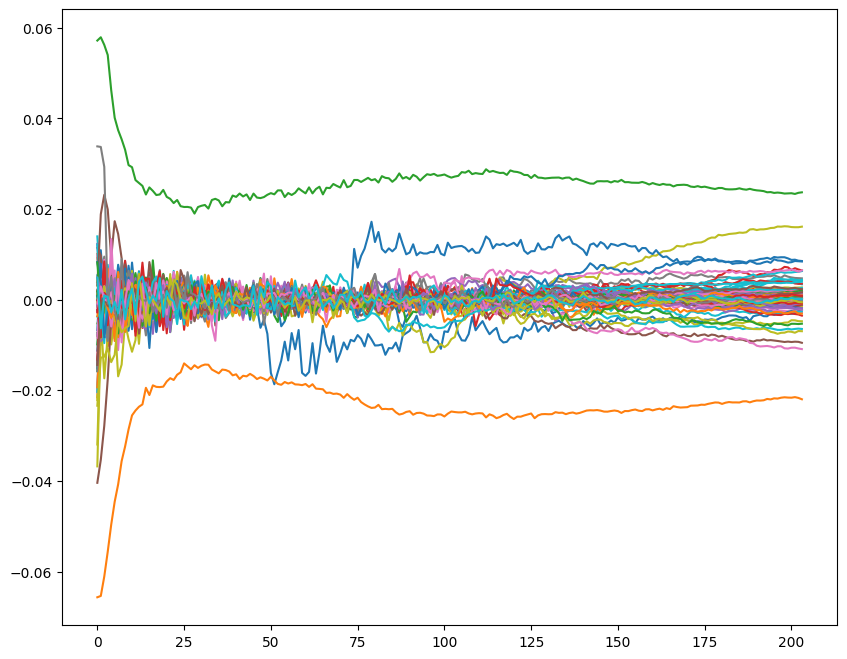

In [743]:
plt.figure(figsize=(10, 8))
for num_par in range(number_pars): 
    plt.plot([i[num_par] for i in pars_save])
# plt.ylim([-0.002, 0.002])
plt.show()

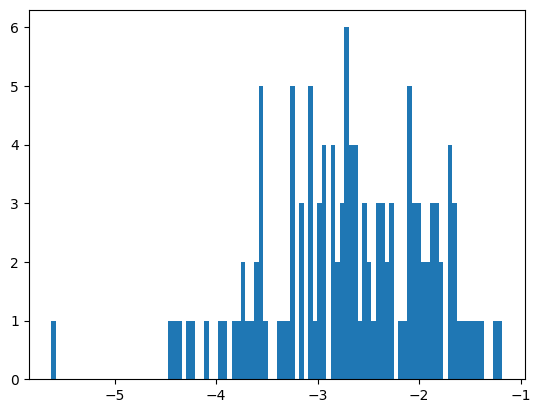

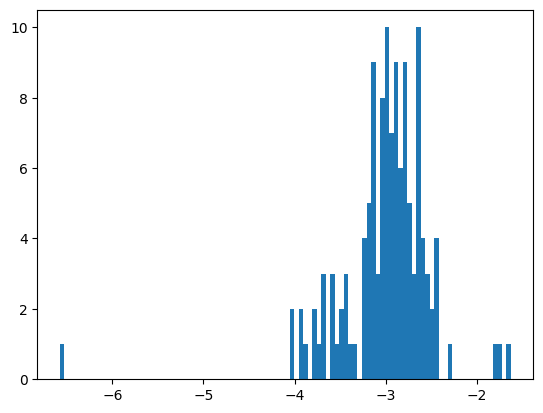

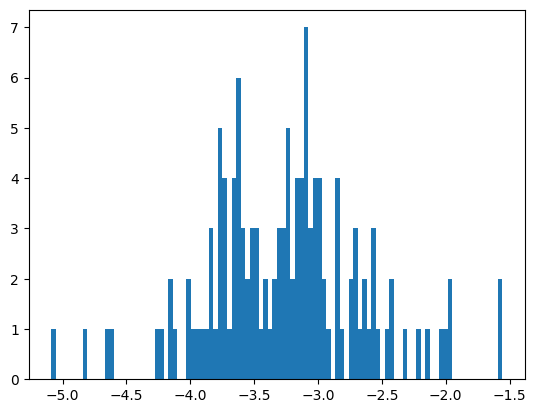

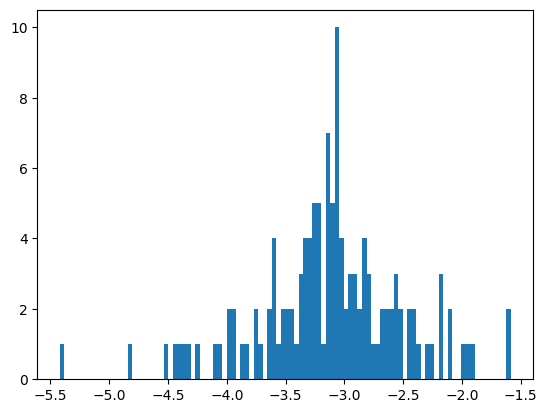

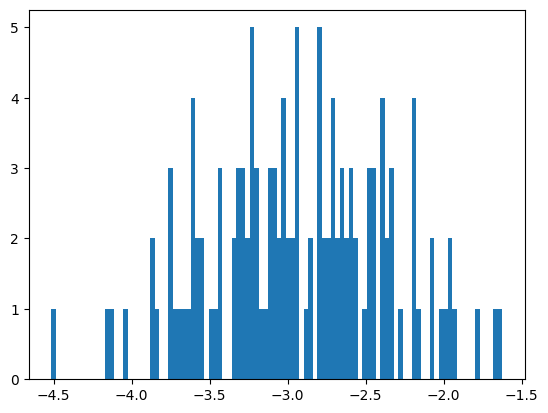

In [744]:
for test_ind in [0, 50, 100, 150, -1]:

    final_par = [np.log10(abs(i)) for i in pars_save[test_ind]]
    plt.hist(final_par, bins=100)
    plt.show()

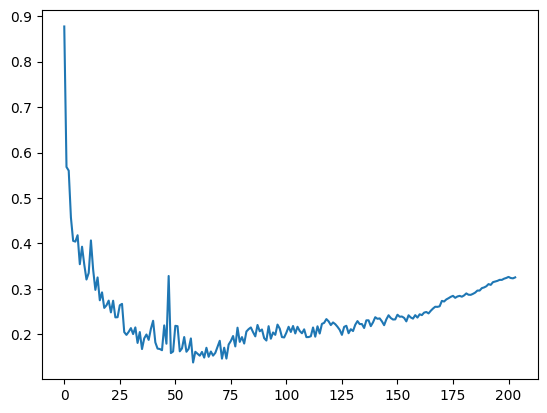

In [745]:
sums = []
for list_curr in pars_save:
    sums.append(sum(abs(i) for i in list_curr))
plt.plot(sums)
plt.show()